# 4.1 - Evaluación

### Regresión

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.model_selection import train_test_split as tts

In [2]:
data=load_diabetes()

In [3]:
X_train, X_test, y_train, y_test = tts(data.data, data.target)

In [4]:
rf=RFR(n_estimators=500)
rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

In [5]:
y_pred[:10]

array([ 61.962, 289.204, 129.442,  94.708, 207.642, 164.23 , 225.65 ,
        78.762,  99.918,  84.444])

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [6]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)

3326.152723279279

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [7]:
mse(y_test, y_pred, squared=False)  #mse(y_test, y_pred)**0.5

57.672807485671086

###### RMSLE


$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(y_i)-log(\hat{y}_i))^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [8]:
from sklearn.metrics import mean_squared_log_error as msle

msle(y_test, y_pred)**0.5

0.4181155681285416

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [9]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

45.75612612612611

###### R2


$$R2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{n}(y_i-\bar{y})^{2}}$$

###### Adjusted R2

$$AdjustedR2 = 1-(1-R^{2})\frac{n-1}{n-p-1}$$


donde:
+ n = tamaño de la muestra
+ p = nº de variables del modelo


pertenecen al intervalo (-$\infty$, 1]

In [10]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.47393317028962323

In [11]:
rf.score(X_test, y_test)

0.47393317028962323

### Clasificación

In [12]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC

data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

In [13]:
'''

Viejo modelo

svc=SVC().fit(X_train, y_train)

y_pred=svc.predict(X_test)
''' 

'\n\nViejo modelo\n\nsvc=SVC().fit(X_train, y_train)\n\ny_pred=svc.predict(X_test)\n'

In [14]:
rfc=RFC().fit(X_train, y_train)

y_pred=rfc.predict(X_test)

In [15]:
y_test[:10]

array([0, 1, 0, 1, 1, 2, 1, 1, 1, 1])

+ TP := True Positive (aciertos clase 1)
+ TN := True Negative (aciertos clase 0)
+ FP := False Positive (Error tipo I, decir 1 cuando es 0)
+ FN := False Negative (Error tipo II, decir 0 cuando es 1)

+ Accuracy  := (TP+TN)/(TP+TN+FP+FN) (acierto)  ($\frac{1}{n}\sum 1(\hat{y_i}=y_i$))
+ Precision := TP/(TP+FP)
+ Recall    := TP/(TP+FN)  (Sensibilidad, TPR)
+ F1_Score  := 2·Recall·Precision/(Recall+Precision)

(F1 funciona mejor que el accuracy cuando los datos no están balanceados y cuando FP y FN son muy diferentes)

![f1](images/f1.png)

##### Accuracy

In [16]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)

0.9555555555555556

In [17]:
#svc.score(y_test, y_pred)

##### Precision

In [18]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='micro')

0.9555555555555556

##### Recall

In [19]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.9603174603174603

##### F1_Score

In [20]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

0.9559082892416226

In [21]:
def suma(x:int)->int:  # tipado de funciones
    return x

In [22]:
suma('hola')

'hola'

##### Matriz de Confusión

![conf_matrix](images/conf_matrix.jpeg)

In [23]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[13,  1,  0],
       [ 0, 20,  1],
       [ 0,  0, 10]])

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
sum(sum(cm(y_test, y_pred)))

45

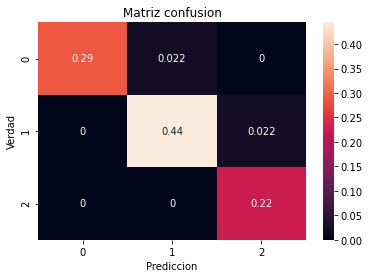

In [26]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), 
               annot=True)

#b, t=ax.get_ylim()  # esto era porque me salia recortado
#ax.set_ylim(b+0.5, t-0.5)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [27]:
sum(sum(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred)))))

1.0

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)


![roc](images/roc.png)

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

data=load_breast_cancer()

X_train, X_test, y_train, y_test=tts(data.data, data.target)


svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test) # predice etiqueta

y_prob=svc.predict_proba(X_test)[::, 1]  # devuelve la prob

In [35]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

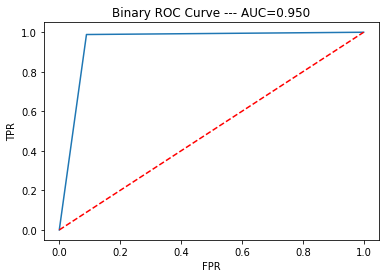

In [37]:
# mal pintao, y_pred

#with plt.xkcd():
    
fpr, tpr, umbrales=roc(y_test, y_pred)  # cuidao, no y_pred
a=auc(y_test, y_pred)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title('Binary ROC Curve --- AUC={:.3f}'.format(a))  # {:.3f} formato del numero

plt.show();

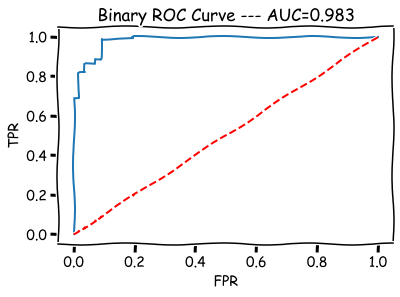

In [38]:
# bien pintado

with plt.xkcd():
    
    fpr, tpr, umbrales=roc(y_test, y_prob)  # cuidado con y_prob tiene que ser
    a=auc(y_test, y_prob)

    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')

    plt.title('Binary ROC Curve --- AUC={:.3f}'.format(a))  # {:.3f} formato del numero

    plt.show();

In [39]:
acc(y_test, y_pred)  # accuracy

0.958041958041958

In [40]:
umbrales

array([1.98416547e+00, 9.84165465e-01, 9.02622010e-01, 8.92569764e-01,
       8.11875447e-01, 8.03285018e-01, 7.81662513e-01, 7.37926156e-01,
       6.65705180e-01, 6.56352075e-01, 3.54636582e-01, 1.51587211e-01,
       1.44733479e-01, 1.75882009e-04])

In [41]:
!pip install scikit-plot

In [42]:
import scikitplot as skplt

In [49]:
data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test)

y_prob=svc.predict_proba(X_test)

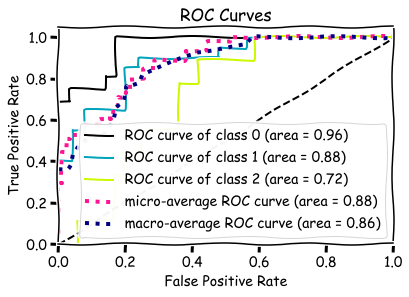

In [53]:
with plt.xkcd():
    skplt.metrics.plot_roc(y_test, y_prob);

In [51]:
acc(y_test, y_pred)

0.6444444444444445